In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [33]:
imagePaths = 'Dataset/'
label_list = ['Jambu', 'Pepaya']
data = []
labels = []

In [34]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [35]:
np.array(data).shape

(100, 32, 32, 3)

In [36]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [37]:
print(labels)

['Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu'
 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu'
 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu'
 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu'
 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu'
 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Jambu' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya']


In [38]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [39]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [40]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


In [41]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 50)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3200)             

In [43]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [44]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [45]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 178ms/step - loss: 0.6370 - accuracy: 0.6000 - val_loss: 0.3810 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 74ms/step - loss: 0.3642 - accuracy: 0.9000 - val_loss: 0.2006 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 93ms/step - loss: 0.1909 - accuracy: 0.9625 - val_loss: 0.0673 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 66ms/step - loss: 0.0927 - accuracy: 0.9750 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 72ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 67ms/step - loss: 0.0255 - accuracy: 0.9875 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 67ms/step - loss: 0.0196 - accuracy: 0.9875 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 8/100
3/3 [==

Epoch 57/100
3/3 [==============================] - 0s 67ms/step - loss: 1.3293e-04 - accuracy: 1.0000 - val_loss: 1.0520e-04 - val_accuracy: 1.0000
Epoch 58/100
3/3 [==============================] - 0s 66ms/step - loss: 1.1303e-04 - accuracy: 1.0000 - val_loss: 9.4569e-05 - val_accuracy: 1.0000
Epoch 59/100
3/3 [==============================] - 0s 93ms/step - loss: 1.6016e-05 - accuracy: 1.0000 - val_loss: 8.8293e-05 - val_accuracy: 1.0000
Epoch 60/100
3/3 [==============================] - 0s 75ms/step - loss: 7.0621e-05 - accuracy: 1.0000 - val_loss: 8.4874e-05 - val_accuracy: 1.0000
Epoch 61/100
3/3 [==============================] - 0s 74ms/step - loss: 6.7448e-05 - accuracy: 1.0000 - val_loss: 8.8764e-05 - val_accuracy: 1.0000
Epoch 62/100
3/3 [==============================] - 0s 80ms/step - loss: 2.6720e-05 - accuracy: 1.0000 - val_loss: 9.4736e-05 - val_accuracy: 1.0000
Epoch 63/100
3/3 [==============================] - 0s 67ms/step - loss: 1.4105e-05 - accuracy: 1.0000 - v

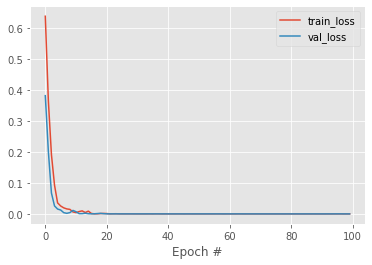

In [46]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [47]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

       Jambu       1.00      1.00      1.00        12
      Pepaya       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



C:\Users\Admin\AppData\Local\Temp\ipykernel_10132\954476436.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)


In [49]:
model.save('jambu_pepaya_class_model.h5')